In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import os
import seaborn as sns

from matplotlib.colors import LogNorm

### Number of events recorded per year

In [5]:
storm_data = pd.read_csv("../Data/Prod_datasets/Storm_events_details_full_clean.csv")

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14952\1569508335.py:1: DtypeWarning: Columns (10,20,22,23,28,29,31,33,34,36,37,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  storm_data = pd.read_csv("../Data/Prod_datasets/Storm_events_details_full_clean.csv")


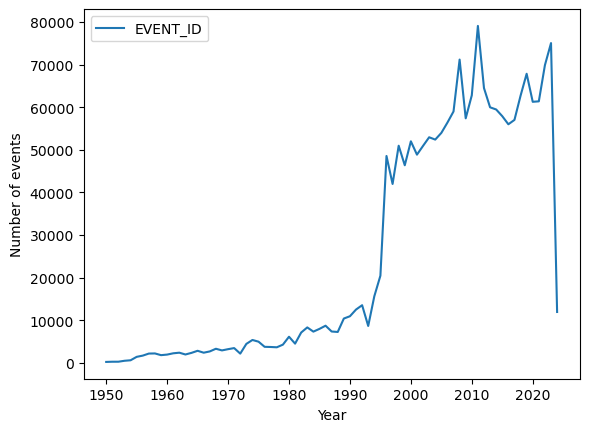

In [6]:
storm_data.groupby("YEAR").count().plot(y = "EVENT_ID")
plt.xlabel("Year")
plt.ylabel("Number of events");

### Narrowing the categories of events

In [7]:
storm_data.columns

Index(['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'inflation_index'],
      dtype='object')

In [8]:
## Creating a mapping table of the storm events

storm_events = storm_data["EVENT_TYPE"].unique()
storm_events.sort()
mapping_table_events = {"EVENT_TYPE": list(storm_events), "EVENT_CAT": ["Astronomical Low Tide", "Avalanche", "Blizzard", "Submersion", "Wind Chill", "Debris Flow", "Fog", "Fog", "Drought", "Dust Devil", "Storm", "Heat", "Wind Chill", "Flood", "Flood", "Fog", "Frost", "High Wind", "Flood", "Hail", "Hail", "Heat", "Heavy Rain", "Heavy Snow", "High Surf", "High Wind", "Hurricane", "Hurricane", "Blizzard", 'Heavy Snow', "Flood", "Lightning", "Fog", "Hail", "High Wind", "Hurricane", "Lightning", "High Wind", "Thunderstorm", "Tropical Storm", "Tropical Storm", "Northern Lights", "Rip Current", "Submersion", "Heavy Snow", "Submersion", "Submersion", "High Wind", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Thunderstorm", "Tornado", "Tornado", "Thunderstorm", "Tornado", "Tropical Depression", "Tropical Storm", "Submersion", "Volcanic Ash", "Volcanic Ash", "Waterspout", "Wildfire", "Blizzard", "Winter Weather"]}
mapping_table_events = pd.DataFrame(mapping_table_events)
print(mapping_table_events.to_string())

                        EVENT_TYPE              EVENT_CAT
0            Astronomical Low Tide  Astronomical Low Tide
1                        Avalanche              Avalanche
2                         Blizzard               Blizzard
3                    Coastal Flood             Submersion
4                  Cold/Wind Chill             Wind Chill
5                      Debris Flow            Debris Flow
6                        Dense Fog                    Fog
7                      Dense Smoke                    Fog
8                          Drought                Drought
9                       Dust Devil             Dust Devil
10                      Dust Storm                  Storm
11                  Excessive Heat                   Heat
12         Extreme Cold/Wind Chill             Wind Chill
13                     Flash Flood                  Flood
14                           Flood                  Flood
15                    Freezing Fog                    Fog
16            

In [8]:
# Merging the dataset with the mapping table
storm_data = storm_data.join(mapping_table_events.set_index("EVENT_TYPE"), on  = "EVENT_TYPE")

### Analysing the occurences of the events

In [9]:
event_count = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"]).count().reset_index()[["YEAR", "EVENT_CAT", "EVENT_ID"]].pivot(columns = "EVENT_CAT", index = "YEAR", values= "EVENT_ID")
event_count.head()

EVENT_CAT,Astronomical Low Tide,Avalanche,Blizzard,Debris Flow,Drought,Dust Devil,Flood,Fog,Frost,Hail,...,Submersion,Thunderstorm,Tornado,Tropical Depression,Tropical Storm,Volcanic Ash,Waterspout,Wildfire,Wind Chill,Winter Weather
YEAR,,,,,,,,,,,,,,,,,,,,,
1996,NaN,7.0,5181.0,24.0,772.0,11.0,5543.0,292.0,72.0,10826.0,...,221.0,10084.0,1267.0,NaN,116.0,NaN,150.0,62.0,2578.0,641.0
1997,5.0,4.0,4564.0,19.0,392.0,8.0,4973.0,307.0,159.0,8612.0,...,120.0,9868.0,1180.0,NaN,12.0,2.0,218.0,37.0,1579.0,1006.0
1998,NaN,17.0,3572.0,3.0,1774.0,4.0,5900.0,407.0,12.0,12561.0,...,186.0,13603.0,1529.0,NaN,144.0,NaN,176.0,113.0,505.0,833.0
1999,NaN,24.0,3777.0,NaN,2662.0,10.0,4096.0,624.0,35.0,10146.0,...,85.0,10347.0,1520.0,NaN,54.0,2.0,270.0,298.0,599.0,1110.0
2000,NaN,29.0,5435.0,2.0,2332.0,3.0,3892.0,488.0,233.0,11296.0,...,13.0,12408.0,1169.0,NaN,44.0,NaN,263.0,372.0,1956.0,571.0


In [10]:
## Normalisation
event_count = event_count/event_count.iloc[0,:]*100 

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8328\1973008306.py:7: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


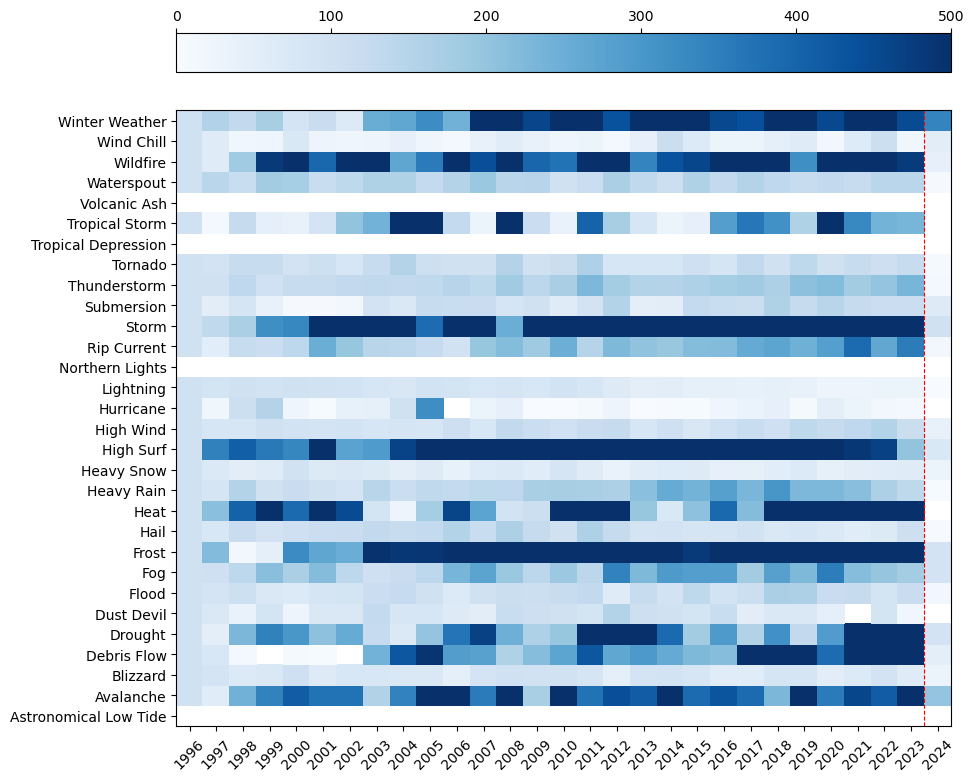

In [11]:
## Plotting the number of events

plt.figure(figsize=(10,10))
plt.pcolor(event_count.T, vmin = 0, vmax = 500, cmap = "Blues")#, norm = LogNorm(vmin = event_count.min(axis = None), vmax = event_count.max(axis = None)))
plt.xticks(ticks = 0.5+np.arange(len(event_count.index)), labels = event_count.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(event_count.columns)), labels = event_count.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(event_count.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Analysing the cost of the events

In [12]:
## Discounting the amounts to have inflation adjusted amounts
storm_data["DISCOUNT_DAMAGE_PROPERTY"] = storm_data["inflation_index"] * storm_data["DAMAGE_PROPERTY"]
storm_data["DISCOUNT_DAMAGE_CROPS"] = storm_data["inflation_index"] * storm_data["DAMAGE_CROPS"]

cost = storm_data.loc[(storm_data["YEAR"]>1995 )& (storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["YEAR", "EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "DISCOUNT_DAMAGE_PROPERTY")
cost.replace(to_replace = [0], value = np.nan, inplace = True) 

# Normalisation
cost = cost/cost.iloc[0, :] * 100

In [13]:
sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = False))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)

cost = cost.T.sort_index(key = sorter)
cost.head()

YEAR,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
EVENT_CAT,,,,,,,,,,,,,,,,,,,,,
Dust Devil,100.0,106.950173,29.186802,73.184437,52.692795,54.199542,58.400894,250.078660,29.586487,72.858764,...,93.335054,129.870262,298.439437,2137.693374,276.613825,217.330810,NaN,733.401664,64.604956,NaN
Rip Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Winter Weather,100.0,68.100786,166.702985,136.920527,30.109280,38.606386,31.664961,57.950261,206.212609,86.828288,...,226.949818,324.707449,220.784580,445.409938,732.124157,154.725574,339.889265,162.214005,709.880058,459.720586
Avalanche,100.0,NaN,174.513985,29.916172,446.770079,20.830022,32.619973,30.622613,118.934315,781.023873,...,NaN,5.000447,47.987705,NaN,573.133966,NaN,1013.226291,NaN,270.629488,81.357451
Thunderstorm,100.0,38.971198,186.020182,51.725609,37.696593,62.158598,49.530376,65.534980,32.260713,76.231359,...,36.146895,26.545779,39.518161,31.685385,30.831882,23.979741,33.286920,24.559961,48.550329,4.516284


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8328\2236484978.py:10: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  a = plt.colorbar(shrink = 1, label = "Change in damages compared to 1996 (%)")


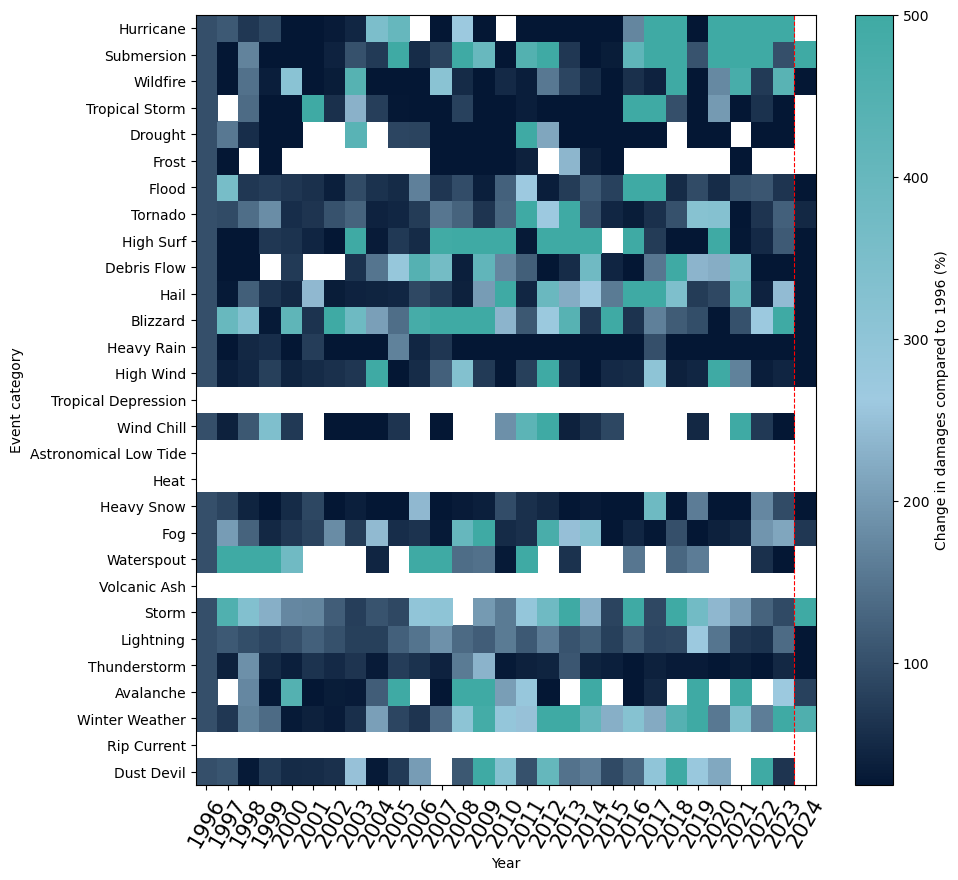

In [14]:
## Plotting the evolution of the costs with time

# plt.rcParams.update({'font.size': 10}) # changes the default fontsize of matplotlib plots
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#041734',"#9FCAE1", '#3FAAA4'], N=256) #9FCAE1

plt.figure(figsize=(10,10))
plt.pcolor(cost, vmin = 25, vmax = 500, cmap = cmap)# norm = LogNorm(vmin = cost.min(axis = None), vmax = cost.max(axis = None)))
plt.xticks(ticks = 0.5+np.arange(len(cost.columns)), labels = cost.columns, rotation = 60, fontsize = 15)
plt.yticks(ticks = 0.5+np.arange(len(cost.index)), labels = cost.index)#, fontsize = 15)
a = plt.colorbar(shrink = 1, label = "Change in damages compared to 1996 (%)")
plt.axvline(x = len(cost.columns)-1, c = "red", linestyle = "dashed", linewidth = 0.8)

plt.xlabel("Year")#, fontdict = {"size":15})
plt.ylabel("Event category")#, fontdict = {"size":15})
plt.show();

In [15]:
storm_data.loc[storm_data["EPISODE_ID"] == 174632.0].head() ## Ian Hurricane 30/09/2022

,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,YEAR,MONTH_NAME,EVENT_TYPE,CZ_TYPE,CZ_FIPS,CZ_NAME,...,BEGIN_LON,END_LAT,END_LON,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE,inflation_index,EVENT_CAT,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS
1771638,174632.0,1058654,FLORIDA,12.0,2022,September,Hurricane,Z,165,COASTAL LEE,...,NaN,NaN,NaN,Hurricane Ian formed in the central Caribbean ...,The highest wind reported in Lee County from H...,CSV,1.159984,Hurricane,8.119886e+09,0.0
1771639,174632.0,1058657,FLORIDA,12.0,2022,September,Hurricane,Z,160,COASTAL SARASOTA,...,NaN,NaN,NaN,Hurricane Ian formed in the central Caribbean ...,The highest wind reported in Sarasota County f...,CSV,1.159984,Hurricane,2.319967e+09,0.0
1771644,174632.0,1058664,FLORIDA,12.0,2022,September,Hurricane,Z,56,HARDEE,...,NaN,NaN,NaN,Hurricane Ian formed in the central Caribbean ...,The highest wind reported in Hardee County fro...,CSV,1.159984,Hurricane,1.159984e+06,0.0
1772307,174632.0,1058655,FLORIDA,12.0,2022,September,Hurricane,Z,162,COASTAL CHARLOTTE,...,NaN,NaN,NaN,Hurricane Ian formed in the central Caribbean ...,The highest wind reported in Charlotte County ...,CSV,1.159984,Hurricane,3.479951e+09,0.0
1772524,174632.0,1058666,FLORIDA,12.0,2022,September,Tropical Storm,Z,50,PINELLAS,...,NaN,NaN,NaN,Hurricane Ian formed in the central Caribbean ...,The highest wind reported in Pinellas County f...,CSV,1.159984,Tropical Storm,5.799919e+07,0.0


### Analysis of casualties

In [16]:
storm_data["INJURIES_TOTAL"] = storm_data["INJURIES_DIRECT"] + storm_data["INJURIES_INDIRECT"]
storm_data["DEATHS_TOTAL"] = storm_data["DEATHS_DIRECT"] + storm_data["DEATHS_INDIRECT"]
injuries = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"])["INJURIES_TOTAL"].sum().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "INJURIES_TOTAL")
injuries.replace(to_replace = [0], value = np.nan, inplace = True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8328\1857900274.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


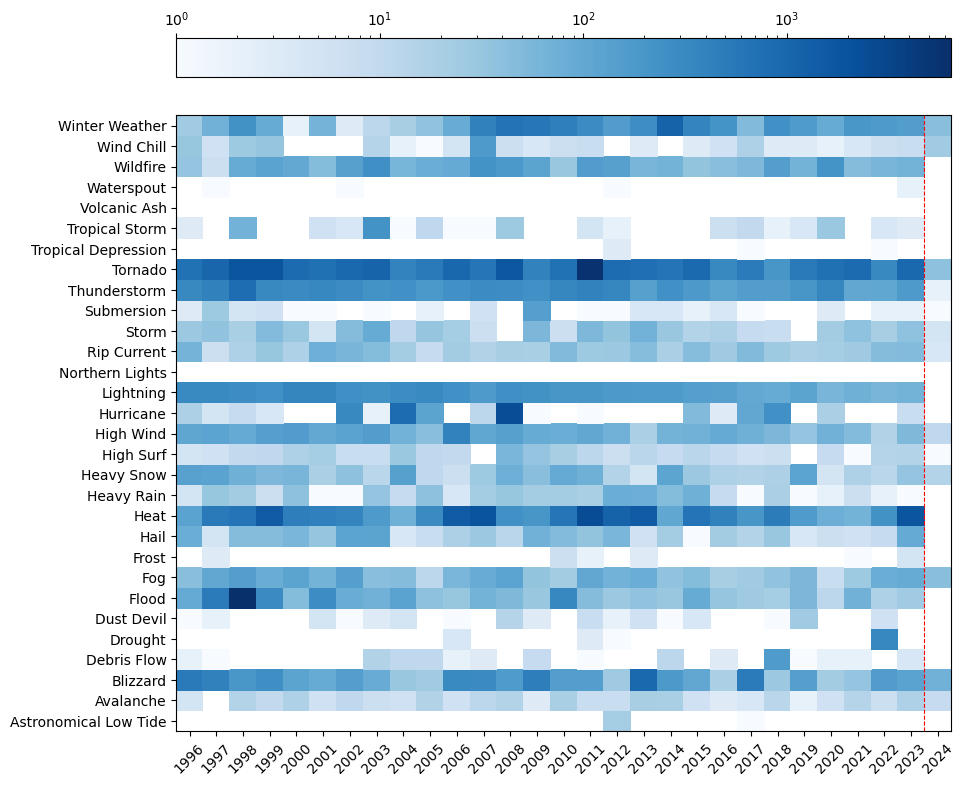

In [17]:
plt.figure(figsize=(10,10))
plt.pcolor(injuries.T, norm = LogNorm(vmin = injuries.min(axis = None), vmax = injuries.max(axis = None)), cmap = "Blues")
plt.xticks(ticks = 0.5+np.arange(len(injuries.index)), labels = injuries.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(injuries.columns)), labels = injuries.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(injuries.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Analysis of fatalities

In [18]:
deaths = storm_data.loc[storm_data["YEAR"]>1995].groupby(["YEAR", "EVENT_CAT"])["DEATHS_TOTAL"].sum().reset_index().pivot(columns = "EVENT_CAT", index = "YEAR", values = "DEATHS_TOTAL")
deaths.replace(to_replace = [0], value = np.nan, inplace = True)

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_8328\4283053850.py:5: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(shrink = 1, location = 'top')


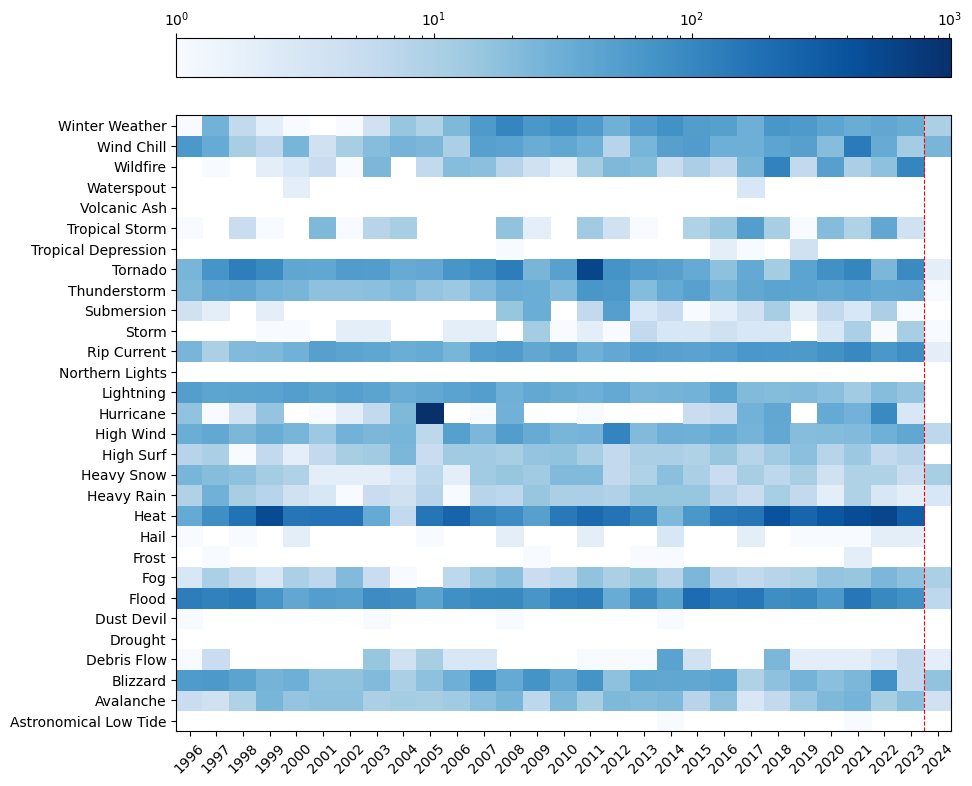

In [19]:
plt.figure(figsize=(10,10))
plt.pcolor(deaths.T, norm = LogNorm(vmin = deaths.min(axis = None), vmax = deaths.max(axis = None)), cmap = "Blues")
plt.xticks(ticks = 0.5+np.arange(len(deaths.index)), labels = deaths.index, rotation = 45)
plt.yticks(ticks = 0.5+np.arange(len(deaths.columns)), labels = deaths.columns)
plt.colorbar(shrink = 1, location = 'top')
plt.axvline(x = len(deaths.index)-1, c = "red", linestyle = "dashed", linewidth = 0.8);

### Cost per type of event (damage to properties)

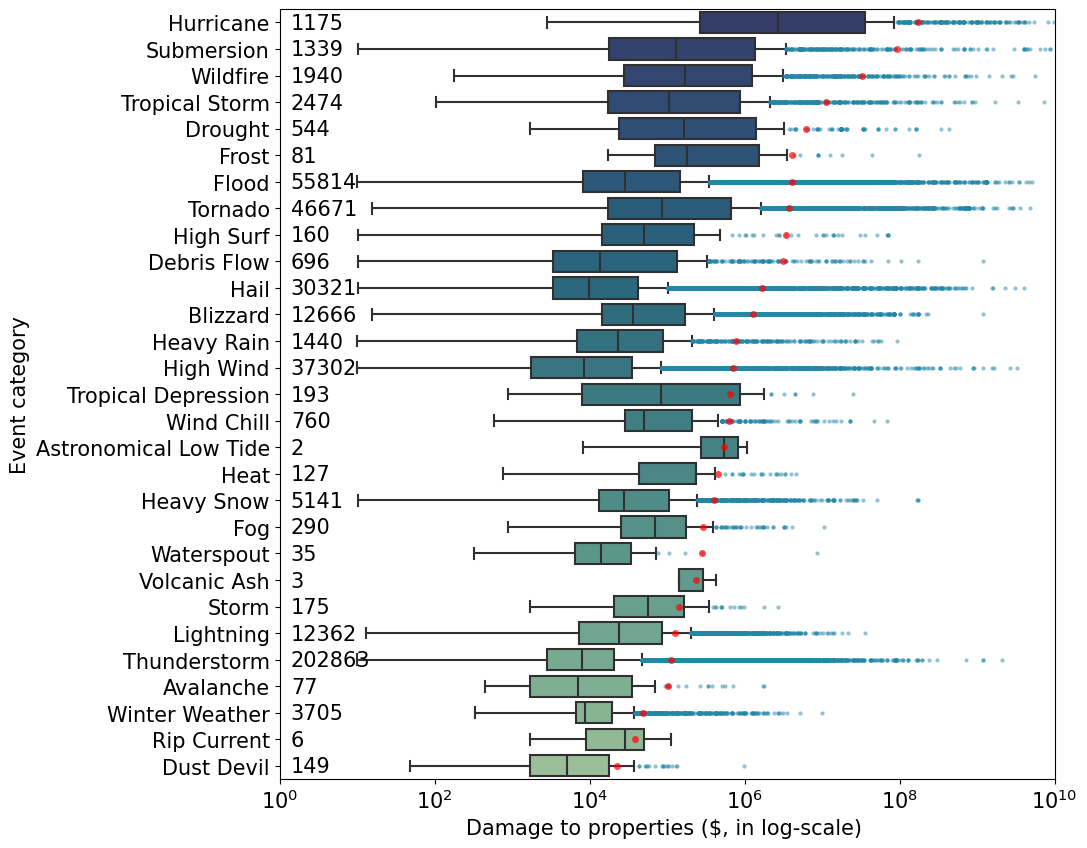

In [20]:
plt.figure(figsize=(10,10))



palette = sns.color_palette("crest_r", 30)

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ["#D8F5DB", '#08316D'], N=256) #9FCAE1

sub_data = storm_data[['EVENT_CAT', "DISCOUNT_DAMAGE_PROPERTY"]].loc[storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0]

sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_PROPERTY"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_PROPERTY"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = True))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)


ax = sns.boxplot(x = 'DISCOUNT_DAMAGE_PROPERTY', y = 'EVENT_CAT', orient = "h",
                data = sub_data.sort_values(by = ["EVENT_CAT"], key = sorter),
                showfliers = True, 
                flierprops = dict(marker='o', markerfacecolor='#2487a8', markersize=3,
                markeredgecolor='none', alpha = 0.5),
                showmeans = True,
                meanprops = dict(marker='o', markerfacecolor='red', markersize=5,
                markeredgecolor='none', alpha = 0.7), 
                palette = palette)


nobs = sub_data["EVENT_CAT"].value_counts()
nobs = dict(sorted(nobs.items(), key=lambda item: sort_index.index(item[0])))
nobs = [str(x) for x in list(nobs.values())]
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(1.4, tick+0.25, nobs[tick], fontdict = {"size":15})

ax.yaxis.set_tick_params(labelsize = 15)
ax.xaxis.set_tick_params(labelsize = 15)

plt.xscale('log')
plt.xlim((1, 1e10))
plt.ylabel("Event category", fontdict = {"size":15})
plt.xlabel("Damage to properties ($, in log-scale) ", fontdict = {"size":15})
plt.show();

### Cost per type of event (crops)

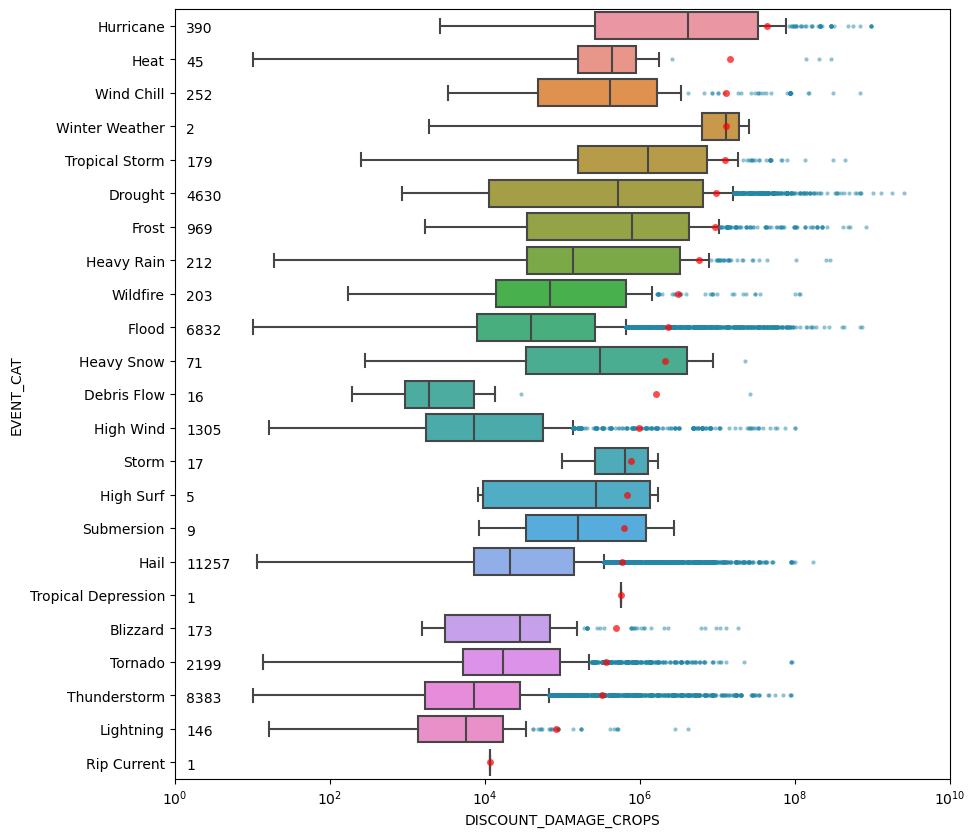

In [21]:
plt.figure(figsize=(10,10))

sub_data = storm_data[['EVENT_CAT', "DISCOUNT_DAMAGE_CROPS"]].loc[storm_data["DISCOUNT_DAMAGE_CROPS"] != 0]

sort_index = storm_data.loc[(storm_data["DISCOUNT_DAMAGE_CROPS"] != 0)].groupby(["EVENT_CAT"])["DISCOUNT_DAMAGE_CROPS"].mean()
sort_index = dict(sorted(sort_index.items(), key=lambda item: item[1], reverse = True))
sort_index = [str(x) for x in list(sort_index.keys())]

def sorter(col, reorder = sort_index):
    mapper = {name: order for order, name in enumerate(reorder)}
    return col.map(mapper)


ax = sns.boxplot(x = 'DISCOUNT_DAMAGE_CROPS', y = 'EVENT_CAT', orient = "h",
             data = sub_data.sort_values(by = ["EVENT_CAT"], key = sorter),
               showfliers = True, flierprops = dict(marker='o', markerfacecolor='#2487a8', markersize=3,
                  markeredgecolor='none', alpha = 0.5),
                  showmeans = True,
                  meanprops = dict(marker='o', markerfacecolor='red', markersize=5,
                  markeredgecolor='none', alpha = 0.7))




nobs = sub_data["EVENT_CAT"].value_counts()
nobs = dict(sorted(nobs.items(), key=lambda item: sort_index.index(item[0])))
nobs = [str(x) for x in list(nobs.values())]
pos = range(len(nobs))

for tick, label in zip(pos, ax.get_yticklabels()):
    ax.text(1.4, tick+0.2, nobs[tick])

plt.xscale('log')
plt.xlim((1, 1e10))
plt.show();

### Geographical data

In [22]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pathlib
import mapclassify as mc

from shapely.geometry import Point

In [24]:
## Mapping the location using the FIPS encoding

FIPS_mapping = pd.read_json("../Data/US_map/fips_map.json").T.reset_index()
FIPS_mapping.rename(columns = {"index": "US_FIPS"}, inplace = True)
FIPS_mapping["US_FIPS"] = FIPS_mapping["US_FIPS"].astype("str")
FIPS_mapping["US_FIPS"].head()

0    1001
1    1003
2    1005
3    1007
4    1009
Name: US_FIPS, dtype: object

In [25]:
storm_data["US_FIPS"] = (storm_data["STATE_FIPS"] * 1000 + storm_data["CZ_FIPS"]).astype("Int64").astype('str')
storm_data["US_FIPS"].head()

0    40149
1    48093
2    42077
3    42043
4    42039
Name: US_FIPS, dtype: object

In [26]:
# Joining the mappinf table with the storm_data dataset
storm_data = storm_data.join(FIPS_mapping[["US_FIPS", "lat", "long"]].set_index("US_FIPS"), on = "US_FIPS")

In [27]:
# Localisation of the events

begin_points = storm_data.apply(
    lambda srs: Point(float(srs['long']), float(srs['lat'])),
    axis='columns'
)
begin_points

0           POINT (-98.991436 35.289497)
1           POINT (-98.549617 31.951645)
2           POINT (-75.590627 40.614241)
3           POINT (-76.792634 40.412565)
4           POINT (-80.107795 41.687876)
                       ...              
1882225    POINT (-101.404211 30.717532)
1882226     POINT (-98.998456 31.764137)
1882227     POINT (-85.803992 34.460929)
1882228     POINT (-87.842814 34.441989)
1882229                      POINT EMPTY
Length: 1882230, dtype: object

In [28]:
# Aumenting the dataset with the location of the events

storm_data_geocoded = gpd.GeoDataFrame(storm_data[['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME','BEGIN_DATE_TIME','CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY','BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'inflation_index', 'EVENT_CAT', 'DISCOUNT_DAMAGE_PROPERTY',
       'DISCOUNT_DAMAGE_CROPS', 'INJURIES_TOTAL', 'DEATHS_TOTAL', "lat", "long"]], geometry=begin_points)
# storm_data_geocoded = storm_data_geocoded.loc[(storm_data_geocoded["BEGIN_LAT"] == storm_data_geocoded["BEGIN_LAT"]) & (storm_data_geocoded["BEGIN_LON"] == storm_data_geocoded["BEGIN_LON"])]

storm_data_geocoded = storm_data_geocoded.loc[(storm_data_geocoded["lat"] == storm_data_geocoded["lat"]) & (storm_data_geocoded["long"] == storm_data_geocoded["long"])]

#### Visualisation of the striking points of the different events

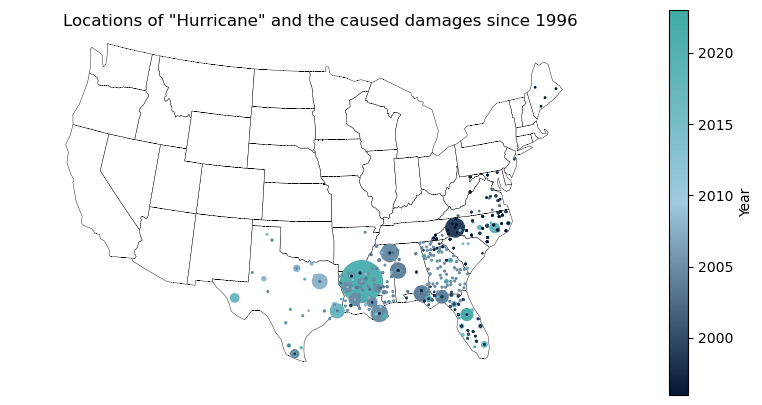

In [29]:
path = gplt.datasets.get_path("contiguous_usa")
contiguous_usa = gpd.read_file(path)

event_cat = "Hurricane"

cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['#041734',"#9FCAE1", '#3FAAA4'], N=256) #9FCAE1

ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea(), linewidth = 0.3, facecolor='white', edgecolor ="k", figsize = (10,10))

gplt.pointplot(storm_data_geocoded.loc[(storm_data_geocoded["EVENT_CAT"] == event_cat) & (storm_data_geocoded["YEAR"] > 1995)],
                ax=ax,
                extent=contiguous_usa.total_bounds,
                projection=gcrs.AlbersEqualArea(),
                hue = "YEAR", scale = "DISCOUNT_DAMAGE_PROPERTY", legend = True, legend_var = "hue",
                legend_kwargs={"shrink": 0.5, "label": "Year"},
                limits = (1, 30), 
                cmap = cmap)


plt.title(f'Locations of "{event_cat}" and the caused damages since 1996');
# Colorscaling acording to the year and size according to the extent of the damages


## Draft space

In [30]:
storm_data_episode = storm_data.groupby(["EPISODE_ID", "STATE", "YEAR", "MONTH_NAME", "EVENT_CAT", "CZ_NAME", "US_FIPS", "lat", "long"])[["DEATHS_TOTAL", "INJURIES_TOTAL", "DISCOUNT_DAMAGE_PROPERTY", "DISCOUNT_DAMAGE_CROPS"]].sum().reset_index()

In [31]:
storm_data_episode.sort_values(by ="YEAR", ascending= True)

,EPISODE_ID,STATE,YEAR,MONTH_NAME,EVENT_CAT,CZ_NAME,US_FIPS,lat,long,DEATHS_TOTAL,INJURIES_TOTAL,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS
902127,990000001.0,FLORIDA,1972,June,Tornado,OKEECHOBEE,12093,27.385592,-80.887388,6,44,1.644999e+06,0.000000
902126,990000001.0,FLORIDA,1972,June,Tornado,HENDRY,12051,26.539967,-81.152114,1,1,3.289999e+04,16449.993692
902125,990000001.0,FLORIDA,1972,June,Tornado,GLADES,12043,26.954810,-81.190820,0,6,6.250998e+05,16449.993692
810700,2049678.0,OKLAHOMA,1996,July,Thunderstorm,ELLIS,40045,36.224258,-99.750139,0,0,5.070218e+05,0.000000
806760,2045907.0,MINNESOTA,1996,September,Lightning,BLUE EARTH,27013,44.033710,-94.064012,0,0,1.690073e+05,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536014,187906.0,OHIO,2024,February,Thunderstorm,FAIRFIELD,39045,39.747694,-82.626685,0,0,2.500000e+04,0.000000
536013,187906.0,OHIO,2024,February,Thunderstorm,CLARK,39023,39.917032,-83.783676,0,0,1.425000e+04,0.000000
536012,187906.0,OHIO,2024,February,Hail,LICKING,39089,40.091505,-82.483435,0,0,0.000000e+00,0.000000
536010,187906.0,OHIO,2024,February,Hail,FAIRFIELD,39045,39.747694,-82.626685,0,0,0.000000e+00,0.000000


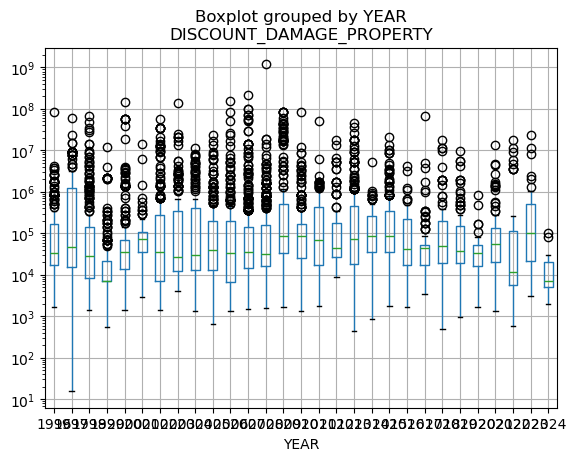

In [32]:
storm_data_episode.loc[(storm_data_episode["EVENT_CAT"] == "Blizzard") & (storm_data_episode["DISCOUNT_DAMAGE_PROPERTY"] != 0)].boxplot(column = "DISCOUNT_DAMAGE_PROPERTY", by = "YEAR", showfliers = True)
plt.yscale("log")

In [33]:
storm_data_episode[["EPISODE_ID", "STATE"]].drop_duplicates()["EPISODE_ID"].astype(str).describe()

count        328375
unique       328370
top       2043604.0
freq              2
Name: EPISODE_ID, dtype: object

In [34]:
storm_data_episode[storm_data_episode["EPISODE_ID"] == 2043604.0]

,EPISODE_ID,STATE,YEAR,MONTH_NAME,EVENT_CAT,CZ_NAME,US_FIPS,lat,long,DEATHS_TOTAL,INJURIES_TOTAL,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS
804368,2043604.0,MARYLAND,1996,July,Tornado,MONTGOMERY,24031,39.137381,-77.203063,0,0,0.000000,8450.363074
804369,2043604.0,VIRGINIA,1996,July,Tornado,LOUDOUN,51107,39.081200,-77.638898,0,0,8450.363074,0.000000


In [35]:
storm_data.columns

Index(['EPISODE_ID', 'EVENT_ID', 'STATE', 'STATE_FIPS', 'YEAR', 'MONTH_NAME',
       'EVENT_TYPE', 'CZ_TYPE', 'CZ_FIPS', 'CZ_NAME', 'WFO', 'BEGIN_DATE_TIME',
       'CZ_TIMEZONE', 'END_DATE_TIME', 'INJURIES_DIRECT', 'INJURIES_INDIRECT',
       'DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS',
       'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE', 'FLOOD_CAUSE', 'CATEGORY',
       'TOR_F_SCALE', 'TOR_LENGTH', 'TOR_WIDTH', 'TOR_OTHER_WFO',
       'TOR_OTHER_CZ_STATE', 'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME',
       'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE',
       'END_AZIMUTH', 'END_LOCATION', 'BEGIN_LAT', 'BEGIN_LON', 'END_LAT',
       'END_LON', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'DATA_SOURCE',
       'inflation_index', 'EVENT_CAT', 'DISCOUNT_DAMAGE_PROPERTY',
       'DISCOUNT_DAMAGE_CROPS', 'INJURIES_TOTAL', 'DEATHS_TOTAL', 'US_FIPS',
       'lat', 'long'],
      dtype='object')

### Wildfires

In [36]:
storm_data.loc[(storm_data["EVENT_CAT"] == "Wildfire") & (storm_data["MAGNITUDE"] == storm_data["MAGNITUDE"])][["EPISODE_ID","EVENT_ID", "YEAR", "STATE", "CZ_FIPS", "DISCOUNT_DAMAGE_PROPERTY", "DISCOUNT_DAMAGE_CROPS", "MAGNITUDE"]]

,EPISODE_ID,EVENT_ID,YEAR,STATE,CZ_FIPS,DISCOUNT_DAMAGE_PROPERTY,DISCOUNT_DAMAGE_CROPS,MAGNITUDE
234819,2403384.0,5540551,1996,KANSAS,177,4.225182e+05,0.0,35.0
241589,2032318.0,5544033,1996,ALASKA,18,1.690073e+07,0.0,32.0
276077,2055579.0,5576435,1996,CALIFORNIA,73,6.320872e+07,0.0,45.0
433530,1093507.0,5141781,2000,COLORADO,3,0.000000e+00,0.0,5000.0
436057,1093507.0,5141780,2000,COLORADO,41,0.000000e+00,0.0,800.0
522170,1146379.0,5324743,2002,CALIFORNIA,39,3.080286e+04,0.0,420.0
542532,1135793.0,5298896,2002,ARIZONA,25,0.000000e+00,0.0,2.2
542549,1134607.0,5296517,2002,CALIFORNIA,19,2.100195e+04,0.0,400.0
542550,1134608.0,5296518,2002,CALIFORNIA,29,2.730254e+06,0.0,3430.0
542917,1134606.0,5296516,2002,CALIFORNIA,29,1.540143e+05,0.0,498.0
